In [11]:
# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

require(data.table)
my_data <- as.data.frame(fread("filtered_contig_heavy_germ-pass.tsv"))
db <- subset(my_data, c_call %in% c("IGHA", "IGHG", "IGHM"))

In [12]:
# Calculate R and S mutation counts
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=FALSE, 
                            nproc=1)
# Show new mutation count columns
db_obs %>% 
    select(sequence_id, starts_with("mu_count_")) %>%
    head(n=4)

,sequence_id,mu_count_seq_r,mu_count_seq_s
,<chr>,<dbl>,<dbl>
1,GTCAAGTCACCTATCC-1_contig_1,0,0
2,CCTACACGTGCTCTTC-1_contig_1,0,0
3,TTGACTTAGGGATACC-1_contig_1,0,0
4,TGACAACCACTTAAGC-1_contig_2,0,0


In [13]:
# Calculate R and S mutation frequencies
db_obs <- observedMutations(db_obs, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,GTCAAGTCACCTATCC-1_contig_1,0,0
2,CCTACACGTGCTCTTC-1_contig_1,0,0
3,TTGACTTAGGGATACC-1_contig_1,0,0
4,TGACAACCACTTAAGC-1_contig_2,0,0


In [14]:
# Calculate combined R and S mutation frequencies
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            combine=TRUE,
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id
,<chr>
1,GTCAAGTCACCTATCC-1_contig_1
2,CCTACACGTGCTCTTC-1_contig_1
3,TTGACTTAGGGATACC-1_contig_1
4,TGACAACCACTTAAGC-1_contig_2


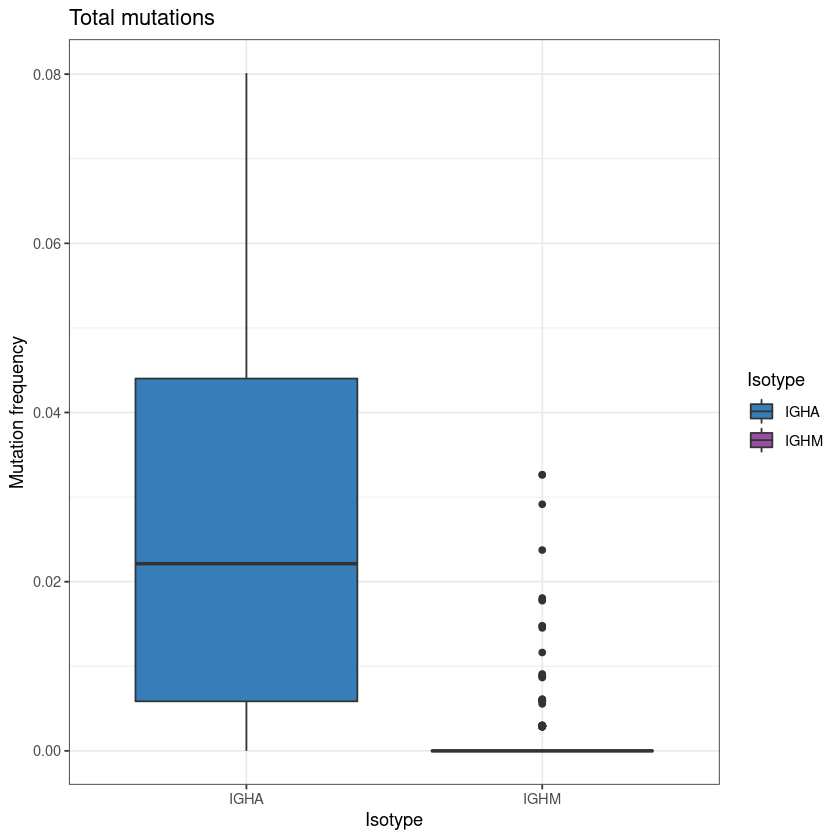

In [15]:
g1 <- ggplot(db_obs, aes(x=c_call, y=mu_freq, fill=c_call)) +
    theme_bw() + ggtitle("Total mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g1)